In [1]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings warnings.filterwarnings("ignore")

In [2]:
# loading data train and test
train= pd.read_csv('Train_aBjfeNk.csv')
test= pd.read_csv('Test_LqhgPWU.csv')

In [3]:
#making copy
train_original=train.copy() 
test_original=test.copy()

In [4]:
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [5]:
train.dtypes, test.dtypes

(ID                   int64
 Gender              object
 Ever_Married        object
 Age                  int64
 Graduated           object
 Profession          object
 Work_Experience    float64
 Spending_Score      object
 Family_Size        float64
 Var_1               object
 Segmentation        object
 dtype: object,
 ID                   int64
 Gender              object
 Ever_Married        object
 Age                  int64
 Graduated           object
 Profession          object
 Work_Experience    float64
 Spending_Score      object
 Family_Size        float64
 Var_1               object
 dtype: object)

In [6]:
train.isnull().sum(), test.isnull().sum()

(ID                   0
 Gender               0
 Ever_Married       140
 Age                  0
 Graduated           78
 Profession         124
 Work_Experience    829
 Spending_Score       0
 Family_Size        335
 Var_1               76
 Segmentation         0
 dtype: int64,
 ID                   0
 Gender               0
 Ever_Married        50
 Age                  0
 Graduated           24
 Profession          38
 Work_Experience    269
 Spending_Score       0
 Family_Size        113
 Var_1               32
 dtype: int64)

In [7]:
#missing value treatment for train and test data

train['Ever_Married'].fillna(train['Ever_Married'].mode()[0], inplace=True) 
train['Graduated'].fillna(train['Graduated'].mode()[0], inplace=True) 
train['Profession'].fillna(train['Profession'].mode()[0], inplace=True) 
train['Work_Experience'].fillna(train['Work_Experience'].mode()[0], inplace=True)
train['Family_Size'].fillna(train['Family_Size'].mode()[0], inplace=True)
train['Var_1'].fillna(train['Var_1'].mode()[0], inplace=True)


test['Ever_Married'].fillna(test['Ever_Married'].mode()[0], inplace=True)
test['Graduated'].fillna(test['Graduated'].mode()[0], inplace=True)
test['Profession'].fillna(test['Profession'].mode()[0], inplace=True)
test['Work_Experience'].fillna(test['Work_Experience'].mode()[0], inplace=True)
test['Family_Size'].fillna(test['Family_Size'].mode()[0], inplace=True)
test['Family_Size'].fillna(test['Family_Size'].mode()[0], inplace=True)
test['Var_1'].fillna(test['Var_1'].mode()[0], inplace=True)

D    28.111056
A    24.442241
C    24.417452
B    23.029251
Name: Segmentation, dtype: float64


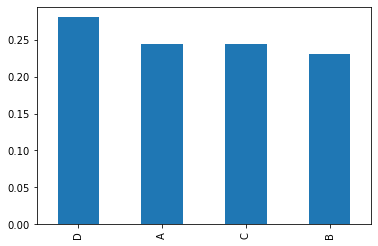

In [8]:
#Basic EDA
print (train['Segmentation'].value_counts(normalize= True)*100)
train['Segmentation'].value_counts(normalize= True).plot(kind= 'bar')

In [9]:
#Dorpping ID from calculations
train= train.drop('ID',axis=1) 
test= test.drop('ID',axis=1)

In [10]:
#target variable
X = train.drop('Segmentation',1) 
y = train.Segmentation

In [11]:
X=pd.get_dummies(X) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

In [12]:
train

,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,...,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Segmentation_A,Segmentation_B,Segmentation_C,Segmentation_D
0,22,1.0,4.0,0,1,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,38,1.0,3.0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0
2,67,1.0,1.0,1,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
3,67,0.0,2.0,0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
4,40,1.0,6.0,1,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,22,0.0,7.0,0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
8064,35,3.0,4.0,0,1,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
8065,33,1.0,1.0,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
8066,27,1.0,4.0,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0


In [13]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.2)

In [14]:
#logistic Regression
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
model = LogisticRegression() 
model.fit(x_train, y_train)

C:\Users\Rajamula\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
#prediction for validation set
pred_cv = model.predict(x_cv)

In [16]:
accuracy_score(y_cv,pred_cv)

0.5

In [17]:
#test prediction
pred_test = model.predict(test)

In [18]:
submission=pd.read_csv("sample_submission_wyi0h0z.csv")

In [19]:
submission['Segmentation']=pred_test 
submission['ID']=test_original['ID']

In [21]:
#writing csv file
pd.DataFrame(submission, columns=['ID','Segmentation']).to_csv('only_logistic.csv', index= False)

In [ ]:
only_logistic= pd.read_csv("only_logistic.csv")

In [ ]:
only_logistic = only_logistic.drop(only_logistic.columns[[0]], axis=1)

In [ ]:
only_logistic.head()

In [22]:
#using K-fold cross validation approach for validation of our model fitness
from sklearn.model_selection import StratifiedKFold

In [23]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits)) 
    xtr,xvl = X.loc[train_index],X.loc[test_index] 
    ytr,yvl = y[train_index],y[test_index]         
    model = LogisticRegression(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
    pred_test = model.predict(test) 
    pred=model.predict_proba(xvl)[:,1]


1 of kfold 5


C:\Users\Rajamula\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy_score 0.4993804213135068

2 of kfold 5


C:\Users\Rajamula\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy_score 0.4962825278810409

3 of kfold 5


C:\Users\Rajamula\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy_score 0.5148698884758365

4 of kfold 5


C:\Users\Rajamula\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy_score 0.49845009299442034

5 of kfold 5
accuracy_score 0.4922504649721017


C:\Users\Rajamula\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
submission['Segmentation']=pred_test 
submission['ID']=test_original['ID']

In [ ]:
pd.DataFrame(submission, columns=['ID','Segmentation']).to_csv('Logistic_CV_Stratified.csv')

In [ ]:
Logistic_CV_Stratified= pd.read_csv("Logistic_CV_Stratified.csv")

In [ ]:
Logistic_CV_Stratified = Logistic_CV_Stratified.drop(Logistic_CV_Stratified.columns[[0]], axis=1)

In [ ]:
Logistic_CV_Stratified.head()